In [1]:
import requests
from bs4 import BeautifulSoup
import sys
import pandas as pd
import numpy as np
from datetime import date
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,10)}, palette='bright')

In [2]:
d0 = date(2017,1,1).strftime('%d.%m.%Y')
d1 = date.today().strftime('%d.%m.%Y')
url = r'https://cbr.ru/hd_base/ostat_depo_new/'
params = {'UniDbQuery.Posted': 'True','UniDbQuery.From': d0, 'UniDbQuery.To': d1}

try:
    site = requests.get(url, params)
except:
    print("Can't get info from ЦБ РФ")
    sys.exit(0)
    
soup = BeautifulSoup(site.text, 'lxml')

days = soup.find('div', class_='table').findAll('tr')

data = []
for day in days:
    vals = day.findAll('td')
    if vals:
        d = []
        for val in vals:
            x = val.text if val.text != ' — ' else 0
            d = d + [x]
        
        data = data + [d]
    else:
        continue

In [3]:
cols = ['Date', 'DA', 'Depo7', 'Depo30', 'DepoUT']
da = pd.DataFrame(data, columns=cols, dtype='string')

da['DA'] = da['DA'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
da['Date'] = da['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y')).astype('datetime64')

da.DA = da.DA / 1000
da = da.iloc[:, 0:2]
da.index = da.Date
da.drop(['Date'], axis=1, inplace=True)
da = da.sort_index()

da.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2017-01-09 to 2022-04-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DA      1348 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


In [4]:
d0 = date(2017,1,1).strftime('%d.%m.%Y')
d1 = date.today().strftime('%d.%m.%Y')
url = r'https://cbr.ru/hd_base/ostat_base/'
params = {'UniDbQuery.Posted': 'True','UniDbQuery.From': d0, 'UniDbQuery.To': d1}

try:
    site = requests.get(url, params)
except:
    print("Can't get info from ЦБ РФ")
    sys.exit(0)
    
soup = BeautifulSoup(site.text, 'lxml')
days = soup.find('div', class_='table').findAll('tr')

data = []
for day in days:
    vals = day.findAll('td')
    if vals:
        d = []
        for val in vals:
            x = val.text if val.text != ' — ' else 0
            d = d + [x]
        
        data = data + [d]
    else:
        continue

In [5]:
cols = ['Date', 'CA', 'CA-Moscow']
ca = pd.DataFrame(data, columns=cols, dtype='string')

ca['CA'] = ca['CA'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
ca['Date'] = ca['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y')).astype('datetime64')

ca = ca.iloc[:, 0:2]
ca.index = ca.Date
ca.drop(['Date'], axis=1, inplace=True)
ca = ca.sort_index()

ca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1310 entries, 2017-01-01 to 2022-04-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CA      1310 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [6]:
old = pd.read_excel('fliqv_old.xlsx', sheet_name='2017-2020')
old.BCurrency = old.BCurrency.astype('float')
old.BSaldo = old.BSaldo + old.BReserve
old.index = old.Date
old.drop(['Date', 'BReserve'], axis=1, inplace=True)
old.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 987 entries, 2017-01-09 to 2020-12-31
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cash       987 non-null    float64
 1   Tresor     987 non-null    float64
 2   SDebt      987 non-null    float64
 3   SDepo      987 non-null    float64
 4   SRepo      987 non-null    float64
 5   SCurrency  987 non-null    float64
 6   BCurrency  987 non-null    float64
 7   BSaldo     987 non-null    float64
dtypes: float64(8)
memory usage: 69.4 KB


In [7]:
d0 = date(2021, 1, 1).strftime('%d.%m.%Y')
d1 = date.today().strftime('%d.%m.%Y')
params = {'UniDbQuery.Posted': 'True','UniDbQuery.From': d0, 'UniDbQuery.To': d1}
url = r'https://www.cbr.ru/statistics/flikvid/'

try:
    site = requests.get(url, params)
except:
    print("Can't get info from ЦБ РФ")
    sys.exit(0)

soup = BeautifulSoup(site.text, 'lxml')

days = soup.find('div', class_='table').find('tbody').findAll('tr')

data = []
for day in days:
    vals = day.findAll('td')
    d = []
    for val in vals:
        d = d + [val.text]
        
    data = data + [d]

In [8]:
cols = ['Date', 'Cash', 'Tresor', 'SDebt', 'SDepo', 'SRepo', 'SCurrency', 'BCurrency', 'BSaldo']
new = pd.DataFrame(data, columns=cols, dtype='string')

new['Cash'] = new['Cash'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['Tresor'] = new['Tresor'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['SDebt'] = new['SDebt'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['SDepo'] = new['SDepo'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['SRepo'] = new['SRepo'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['SCurrency'] = new['SCurrency'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['BCurrency'] = new['BCurrency'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['BSaldo'] = new['BSaldo'].apply(lambda x: x.replace(',','.').replace(' ','')).astype('float64')
new['Date'] = new['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y')).astype('datetime64')

new.index = new.Date
new = new.sort_index()
new.drop(['Date'], axis=1, inplace=True)

new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 2021-01-11 to 2022-04-15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cash       315 non-null    float64
 1   Tresor     315 non-null    float64
 2   SDebt      315 non-null    float64
 3   SDepo      315 non-null    float64
 4   SRepo      315 non-null    float64
 5   SCurrency  315 non-null    float64
 6   BCurrency  315 non-null    float64
 7   BSaldo     315 non-null    float64
dtypes: float64(8)
memory usage: 22.1 KB


In [9]:
fl = pd.concat([old, new]).sort_index()
fl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1302 entries, 2017-01-09 to 2022-04-15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cash       1302 non-null   float64
 1   Tresor     1302 non-null   float64
 2   SDebt      1302 non-null   float64
 3   SDepo      1302 non-null   float64
 4   SRepo      1302 non-null   float64
 5   SCurrency  1302 non-null   float64
 6   BCurrency  1302 non-null   float64
 7   BSaldo     1302 non-null   float64
dtypes: float64(8)
memory usage: 91.5 KB


In [10]:
ba = pd.concat([ca, da], axis=1, join='inner').sort_index(ascending=False)

ba['DA-Delta'] = -ba['DA'].diff()
ba['DA-Delta'] = ba['DA-Delta'].fillna(0)
ba['CA-Delta'] = -ba['CA'].diff()
ba['CA-Delta'] = ba['CA-Delta'].fillna(0)

ba = ba.sort_index()
ba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2017-01-09 to 2022-04-18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CA        1303 non-null   float64
 1   DA        1303 non-null   float64
 2   DA-Delta  1303 non-null   float64
 3   CA-Delta  1303 non-null   float64
dtypes: float64(4)
memory usage: 50.9 KB


In [11]:
df = pd.concat([fl, ba], axis=1, join='inner')
df.describe()

,Cash,Tresor,SDebt,SDepo,SRepo,SCurrency,BCurrency,BSaldo,CA,DA,DA-Delta,CA-Delta
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,-3.580568,3.019432,-4.428879,1.771813,0.657296,6.808602,-0.079570,-0.696697,2455.676959,1757.545637,1.541142,-0.787558
std,54.389536,256.714505,44.124521,83.272086,109.896855,9.984009,2.406792,390.948864,652.735363,800.455252,360.643863,415.439866
min,-1414.100000,-2608.400000,-418.600000,-430.400000,-440.000000,-23.000000,-84.800000,-2360.200000,677.700000,377.969390,-3169.689440,-2291.800000
25%,-22.775000,-83.725000,0.000000,0.000000,-12.100000,0.000000,0.000000,-63.200000,2014.025000,1118.435040,-12.034555,-144.275000
50%,-2.300000,30.350000,0.000000,0.000000,0.000000,6.500000,0.000000,-3.700000,2396.250000,1610.888790,2.113785,9.400000
75%,13.900000,126.225000,0.000000,8.025000,19.800000,14.300000,0.000000,24.200000,2788.475000,2350.258610,37.588452,132.675000
max,306.100000,852.900000,362.200000,747.800000,500.000000,66.500000,0.000000,3079.200000,4840.100000,4616.514150,1665.047100,3000.200000


In [12]:
df['Debt'] = df['SDebt'] + df['SDepo'] + df['SRepo']
df['Budjet'] = df['Tresor'] - df['Debt'] - df['SCurrency']
df['Currency'] = df['SCurrency'] + df['BCurrency']
df['CB']= df['BSaldo'] + df['DA-Delta']
df['FL-All'] = df['Cash'] + df['Tresor'] + df['BCurrency'] + df['CB']

df.tail(10)

,Cash,Tresor,SDebt,SDepo,SRepo,SCurrency,BCurrency,BSaldo,CA,DA,DA-Delta,CA-Delta,Debt,Budjet,Currency,CB,FL-All
Date,,,,,,,,,,,,,,,,,
2022-04-04,84.5,217.6,0.0,-104.3,200.0,0.0,0.0,-8.8,760.2,3175.22865,15.20440,293.4,95.7,121.9,0.0,6.40440,308.50440
2022-04-05,40.1,368.7,29.9,-88.0,0.0,0.0,0.0,-120.0,1053.6,3190.43305,136.22754,288.8,-58.1,426.8,0.0,16.22754,425.02754
2022-04-06,29.8,108.0,-3.0,0.0,2.0,0.0,0.0,-421.9,1342.4,3326.66059,39.51552,-283.9,-1.0,109.0,0.0,-382.38448,-244.58448
2022-04-07,20.8,462.9,0.0,-200.0,95.0,0.0,0.0,-350.8,1058.5,3366.17611,313.16752,132.7,-105.0,567.9,0.0,-37.63248,446.06752
2022-04-08,11.4,19.6,0.0,-100.0,0.0,0.0,0.0,-544.3,1191.2,3679.34363,510.97660,-513.5,-100.0,119.6,0.0,-33.32340,-2.32340
2022-04-11,43.6,-130.1,0.0,-332.7,100.0,0.0,0.0,1623.5,677.7,4190.32023,-613.15375,1536.9,-232.7,102.6,0.0,1010.34625,923.84625
2022-04-12,19.5,-429.0,34.0,-120.0,0.0,0.0,0.0,-213.5,2214.6,3577.16648,395.62389,-622.6,-86.0,-343.0,0.0,182.12389,-227.37611
2022-04-13,23.4,56.9,-0.6,0.0,8.0,0.0,0.0,-758.7,1592.0,3972.79037,-1140.28364,-678.4,7.4,49.5,0.0,-1898.98364,-1818.68364
2022-04-14,5.2,95.6,0.0,-100.1,131.0,0.0,0.0,0.1,913.6,2832.50673,41.05054,100.3,30.9,64.7,0.0,41.15054,141.95054


<AxesSubplot:xlabel='Date'>

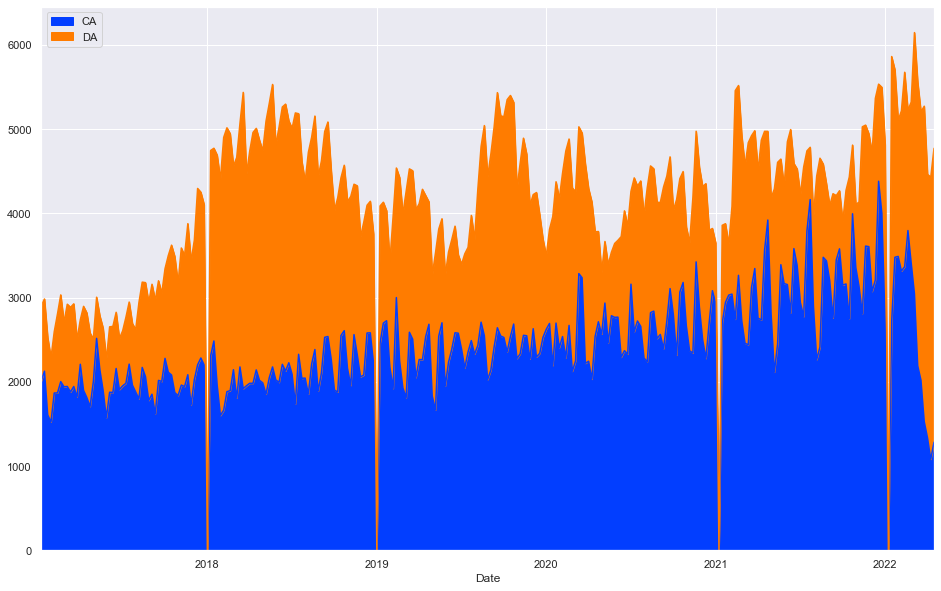

In [18]:
df.loc[:,['CA', 'DA']].resample('W').mean().plot.area()

<AxesSubplot:xlabel='Date'>

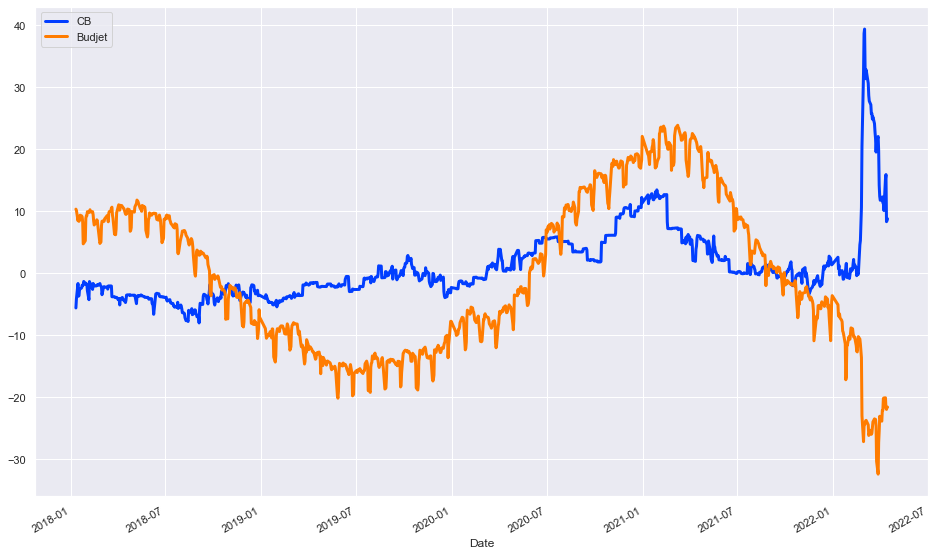

In [14]:
df.loc[:,['CB', 'Budjet']].rolling(250).mean().plot(linewidth=3.0)

<AxesSubplot:xlabel='Date'>

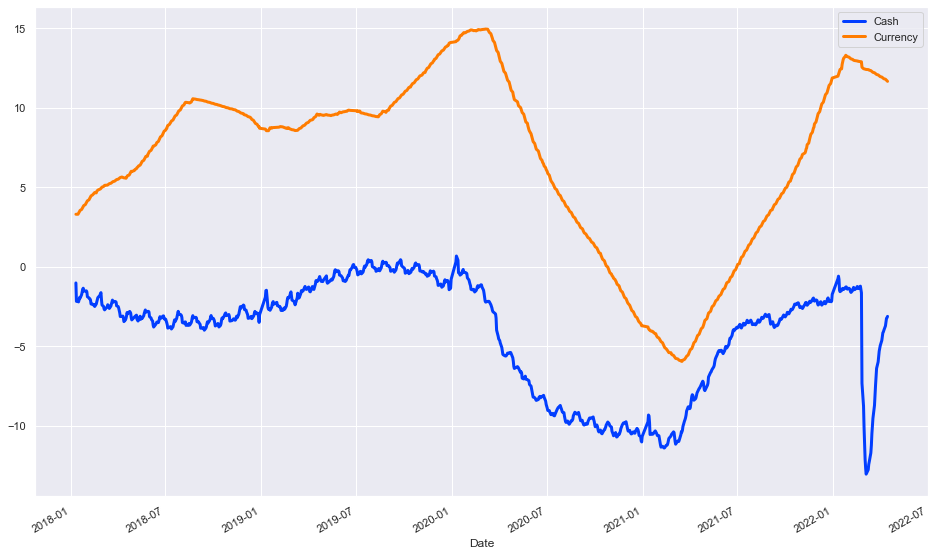

In [15]:
df.loc[:,['Cash', 'Currency']].rolling(250).mean().plot(linewidth=3.0)

<AxesSubplot:xlabel='Date'>

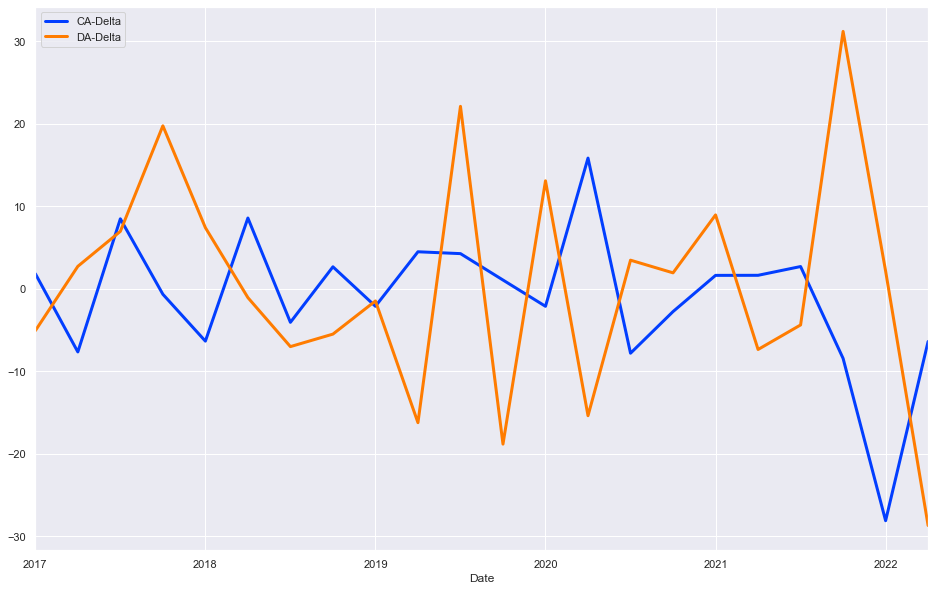

In [16]:
df.loc[:,['CA-Delta', 'DA-Delta']].resample('Q').mean().plot(linewidth=3.0)

In [17]:
df.to_excel('data_2017-CD.xlsx', sheet_name='Data')